# 순환 신경망 모델 만들어보기
Source : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/

In [3]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2datasbet(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [5]:
# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
one hot encoding vector size is  12


In [6]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [7]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [8]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])
    

Epoch 1/2000
 - 1s - loss: 2.4693 - acc: 0.2200
Epoch 2/2000
 - 0s - loss: 2.3630 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.2776 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.1984 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.1186 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.0573 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9939 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9597 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9287 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9103 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8919 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8814 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8641 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8475 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.8310 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.8200 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.8089 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.7963 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.7831 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.7762 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

 - 0s - loss: 1.2309 - acc: 0.5600
Epoch 168/2000
 - 0s - loss: 1.2330 - acc: 0.5600
Epoch 169/2000
 - 0s - loss: 1.2316 - acc: 0.5600
Epoch 170/2000
 - 0s - loss: 1.2331 - acc: 0.5600
Epoch 171/2000
 - 0s - loss: 1.2283 - acc: 0.5400
Epoch 172/2000
 - 0s - loss: 1.2265 - acc: 0.5400
Epoch 173/2000
 - 0s - loss: 1.2155 - acc: 0.5600
Epoch 174/2000
 - 0s - loss: 1.2153 - acc: 0.5600
Epoch 175/2000
 - 0s - loss: 1.2203 - acc: 0.5600
Epoch 176/2000
 - 0s - loss: 1.2139 - acc: 0.6000
Epoch 177/2000
 - 0s - loss: 1.2062 - acc: 0.5600
Epoch 178/2000
 - 0s - loss: 1.2099 - acc: 0.5400
Epoch 179/2000
 - 0s - loss: 1.2121 - acc: 0.5600
Epoch 180/2000
 - 0s - loss: 1.2017 - acc: 0.5600
Epoch 181/2000
 - 0s - loss: 1.2021 - acc: 0.5600
Epoch 182/2000
 - 0s - loss: 1.2015 - acc: 0.5400
Epoch 183/2000
 - 0s - loss: 1.1993 - acc: 0.5600
Epoch 184/2000
 - 0s - loss: 1.1959 - acc: 0.5600
Epoch 185/2000
 - 0s - loss: 1.1949 - acc: 0.5800
Epoch 186/2000
 - 0s - loss: 1.1909 - acc: 0.5800
Epoch 187/2000


Epoch 332/2000
 - 0s - loss: 0.9496 - acc: 0.6200
Epoch 333/2000
 - 0s - loss: 0.9438 - acc: 0.6200
Epoch 334/2000
 - 0s - loss: 0.9483 - acc: 0.6000
Epoch 335/2000
 - 0s - loss: 0.9517 - acc: 0.6000
Epoch 336/2000
 - 0s - loss: 0.9430 - acc: 0.6400
Epoch 337/2000
 - 0s - loss: 0.9442 - acc: 0.6200
Epoch 338/2000
 - 0s - loss: 0.9446 - acc: 0.6400
Epoch 339/2000
 - 0s - loss: 0.9473 - acc: 0.6400
Epoch 340/2000
 - 0s - loss: 0.9341 - acc: 0.6000
Epoch 341/2000
 - 0s - loss: 0.9418 - acc: 0.6000
Epoch 342/2000
 - 0s - loss: 0.9407 - acc: 0.6000
Epoch 343/2000
 - 0s - loss: 0.9304 - acc: 0.6400
Epoch 344/2000
 - 0s - loss: 0.9309 - acc: 0.6000
Epoch 345/2000
 - 0s - loss: 0.9338 - acc: 0.6200
Epoch 346/2000
 - 0s - loss: 0.9294 - acc: 0.6200
Epoch 347/2000
 - 0s - loss: 0.9304 - acc: 0.5800
Epoch 348/2000
 - 0s - loss: 0.9420 - acc: 0.6200
Epoch 349/2000
 - 0s - loss: 0.9232 - acc: 0.6200
Epoch 350/2000
 - 0s - loss: 0.9237 - acc: 0.6400
Epoch 351/2000
 - 0s - loss: 0.9241 - acc: 0.5800


Epoch 496/2000
 - 0s - loss: 0.7634 - acc: 0.7400
Epoch 497/2000
 - 0s - loss: 0.7601 - acc: 0.7400
Epoch 498/2000
 - 0s - loss: 0.7557 - acc: 0.7400
Epoch 499/2000
 - 0s - loss: 0.7605 - acc: 0.7400
Epoch 500/2000
 - 0s - loss: 0.7593 - acc: 0.7800
Epoch 501/2000
 - 0s - loss: 0.7568 - acc: 0.7600
Epoch 502/2000
 - 0s - loss: 0.7610 - acc: 0.7400
Epoch 503/2000
 - 0s - loss: 0.7564 - acc: 0.7400
Epoch 504/2000
 - 0s - loss: 0.7549 - acc: 0.7800
Epoch 505/2000
 - 0s - loss: 0.7592 - acc: 0.7400
Epoch 506/2000
 - 0s - loss: 0.7643 - acc: 0.7600
Epoch 507/2000
 - 0s - loss: 0.7549 - acc: 0.7600
Epoch 508/2000
 - 0s - loss: 0.7572 - acc: 0.7600
Epoch 509/2000
 - 0s - loss: 0.7464 - acc: 0.7600
Epoch 510/2000
 - 0s - loss: 0.7472 - acc: 0.7800
Epoch 511/2000
 - 0s - loss: 0.7606 - acc: 0.7600
Epoch 512/2000
 - 0s - loss: 0.7409 - acc: 0.7800
Epoch 513/2000
 - 0s - loss: 0.7523 - acc: 0.7400
Epoch 514/2000
 - 0s - loss: 0.7515 - acc: 0.7000
Epoch 515/2000
 - 0s - loss: 0.7433 - acc: 0.7400


Epoch 660/2000
 - 0s - loss: 0.6079 - acc: 0.8200
Epoch 661/2000
 - 0s - loss: 0.6165 - acc: 0.8000
Epoch 662/2000
 - 0s - loss: 0.6144 - acc: 0.8200
Epoch 663/2000
 - 0s - loss: 0.6097 - acc: 0.8600
Epoch 664/2000
 - 0s - loss: 0.6185 - acc: 0.8600
Epoch 665/2000
 - 0s - loss: 0.6043 - acc: 0.8200
Epoch 666/2000
 - 0s - loss: 0.6149 - acc: 0.8200
Epoch 667/2000
 - 0s - loss: 0.6058 - acc: 0.8200
Epoch 668/2000
 - 0s - loss: 0.6051 - acc: 0.8000
Epoch 669/2000
 - 0s - loss: 0.6030 - acc: 0.8400
Epoch 670/2000
 - 0s - loss: 0.6052 - acc: 0.8200
Epoch 671/2000
 - 0s - loss: 0.6052 - acc: 0.8200
Epoch 672/2000
 - 0s - loss: 0.5959 - acc: 0.8400
Epoch 673/2000
 - 0s - loss: 0.6082 - acc: 0.8000
Epoch 674/2000
 - 0s - loss: 0.6064 - acc: 0.8400
Epoch 675/2000
 - 0s - loss: 0.6039 - acc: 0.8200
Epoch 676/2000
 - 0s - loss: 0.5905 - acc: 0.8600
Epoch 677/2000
 - 0s - loss: 0.6082 - acc: 0.7800
Epoch 678/2000
 - 0s - loss: 0.5952 - acc: 0.8400
Epoch 679/2000
 - 0s - loss: 0.6040 - acc: 0.8200


Epoch 824/2000
 - 0s - loss: 0.4948 - acc: 0.9000
Epoch 825/2000
 - 0s - loss: 0.4917 - acc: 0.8800
Epoch 826/2000
 - 0s - loss: 0.4873 - acc: 0.8800
Epoch 827/2000
 - 0s - loss: 0.4864 - acc: 0.8800
Epoch 828/2000
 - 0s - loss: 0.4898 - acc: 0.8800
Epoch 829/2000
 - 0s - loss: 0.4924 - acc: 0.8800
Epoch 830/2000
 - 0s - loss: 0.4955 - acc: 0.9000
Epoch 831/2000
 - 0s - loss: 0.4894 - acc: 0.8800
Epoch 832/2000
 - 0s - loss: 0.4995 - acc: 0.8800
Epoch 833/2000
 - 0s - loss: 0.4812 - acc: 0.8800
Epoch 834/2000
 - 0s - loss: 0.4940 - acc: 0.8600
Epoch 835/2000
 - 0s - loss: 0.4850 - acc: 0.8800
Epoch 836/2000
 - 0s - loss: 0.4873 - acc: 0.9000
Epoch 837/2000
 - 0s - loss: 0.4853 - acc: 0.8800
Epoch 838/2000
 - 0s - loss: 0.4803 - acc: 0.8800
Epoch 839/2000
 - 0s - loss: 0.4841 - acc: 0.8800
Epoch 840/2000
 - 0s - loss: 0.4842 - acc: 0.8800
Epoch 841/2000
 - 0s - loss: 0.4812 - acc: 0.9000
Epoch 842/2000
 - 0s - loss: 0.4903 - acc: 0.8600
Epoch 843/2000
 - 0s - loss: 0.4812 - acc: 0.8600


Epoch 988/2000
 - 0s - loss: 0.4085 - acc: 0.9000
Epoch 989/2000
 - 0s - loss: 0.4085 - acc: 0.9000
Epoch 990/2000
 - 0s - loss: 0.4116 - acc: 0.9200
Epoch 991/2000
 - 0s - loss: 0.4052 - acc: 0.9200
Epoch 992/2000
 - 0s - loss: 0.4027 - acc: 0.9000
Epoch 993/2000
 - 0s - loss: 0.4048 - acc: 0.9000
Epoch 994/2000
 - 0s - loss: 0.4031 - acc: 0.8800
Epoch 995/2000
 - 0s - loss: 0.3966 - acc: 0.9000
Epoch 996/2000
 - 0s - loss: 0.4033 - acc: 0.9000
Epoch 997/2000
 - 0s - loss: 0.4033 - acc: 0.9200
Epoch 998/2000
 - 0s - loss: 0.3966 - acc: 0.9200
Epoch 999/2000
 - 0s - loss: 0.3960 - acc: 0.9000
Epoch 1000/2000
 - 0s - loss: 0.4028 - acc: 0.9000
Epoch 1001/2000
 - 0s - loss: 0.3963 - acc: 0.9000
Epoch 1002/2000
 - 0s - loss: 0.3999 - acc: 0.9200
Epoch 1003/2000
 - 0s - loss: 0.3944 - acc: 0.9000
Epoch 1004/2000
 - 0s - loss: 0.3961 - acc: 0.8800
Epoch 1005/2000
 - 0s - loss: 0.3897 - acc: 0.8800
Epoch 1006/2000
 - 0s - loss: 0.4050 - acc: 0.9000
Epoch 1007/2000
 - 0s - loss: 0.3972 - acc:

Epoch 1149/2000
 - 0s - loss: 0.3433 - acc: 0.9200
Epoch 1150/2000
 - 0s - loss: 0.3394 - acc: 0.9000
Epoch 1151/2000
 - 0s - loss: 0.3442 - acc: 0.9200
Epoch 1152/2000
 - 0s - loss: 0.3692 - acc: 0.9200
Epoch 1153/2000
 - 0s - loss: 0.3450 - acc: 0.9200
Epoch 1154/2000
 - 0s - loss: 0.3497 - acc: 0.8800
Epoch 1155/2000
 - 0s - loss: 0.3369 - acc: 0.9200
Epoch 1156/2000
 - 0s - loss: 0.3345 - acc: 0.9000
Epoch 1157/2000
 - 0s - loss: 0.3369 - acc: 0.9200
Epoch 1158/2000
 - 0s - loss: 0.3365 - acc: 0.9200
Epoch 1159/2000
 - 0s - loss: 0.3371 - acc: 0.9200
Epoch 1160/2000
 - 0s - loss: 0.3416 - acc: 0.9000
Epoch 1161/2000
 - 0s - loss: 0.3503 - acc: 0.9200
Epoch 1162/2000
 - 0s - loss: 0.3436 - acc: 0.9200
Epoch 1163/2000
 - 0s - loss: 0.3437 - acc: 0.9200
Epoch 1164/2000
 - 0s - loss: 0.3514 - acc: 0.9000
Epoch 1165/2000
 - 0s - loss: 0.3357 - acc: 0.9200
Epoch 1166/2000
 - 0s - loss: 0.3310 - acc: 0.9200
Epoch 1167/2000
 - 0s - loss: 0.3368 - acc: 0.9200
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.2964 - acc: 0.9200
Epoch 1311/2000
 - 0s - loss: 0.3100 - acc: 0.9200
Epoch 1312/2000
 - 0s - loss: 0.2883 - acc: 0.9200
Epoch 1313/2000
 - 0s - loss: 0.3031 - acc: 0.9200
Epoch 1314/2000
 - 0s - loss: 0.2953 - acc: 0.9000
Epoch 1315/2000
 - 0s - loss: 0.3117 - acc: 0.9200
Epoch 1316/2000
 - 0s - loss: 0.2877 - acc: 0.9200
Epoch 1317/2000
 - 0s - loss: 0.2968 - acc: 0.9200
Epoch 1318/2000
 - 0s - loss: 0.2941 - acc: 0.9200
Epoch 1319/2000
 - 0s - loss: 0.3023 - acc: 0.9000
Epoch 1320/2000
 - 0s - loss: 0.3052 - acc: 0.9200
Epoch 1321/2000
 - 0s - loss: 0.2976 - acc: 0.9200
Epoch 1322/2000
 - 0s - loss: 0.2965 - acc: 0.9200
Epoch 1323/2000
 - 0s - loss: 0.2929 - acc: 0.9000
Epoch 1324/2000
 - 0s - loss: 0.2935 - acc: 0.9200
Epoch 1325/2000
 - 0s - loss: 0.3109 - acc: 0.9200
Epoch 1326/2000
 - 0s - loss: 0.2832 - acc: 0.9200
Epoch 1327/2000
 - 0s - loss: 0.2896 - acc: 0.9000
Epoch 1328/2000
 - 0s - loss: 0.2937 - acc: 0.9200
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.2606 - acc: 0.9200
Epoch 1472/2000
 - 0s - loss: 0.2717 - acc: 0.9200
Epoch 1473/2000
 - 0s - loss: 0.2946 - acc: 0.8800
Epoch 1474/2000
 - 0s - loss: 0.2785 - acc: 0.9000
Epoch 1475/2000
 - 0s - loss: 0.2661 - acc: 0.9000
Epoch 1476/2000
 - 0s - loss: 0.2905 - acc: 0.9000
Epoch 1477/2000
 - 0s - loss: 0.2658 - acc: 0.9200
Epoch 1478/2000
 - 0s - loss: 0.2633 - acc: 0.9200
Epoch 1479/2000
 - 0s - loss: 0.2752 - acc: 0.9200
Epoch 1480/2000
 - 0s - loss: 0.2526 - acc: 0.9200
Epoch 1481/2000
 - 0s - loss: 0.2615 - acc: 0.9200
Epoch 1482/2000
 - 0s - loss: 0.2589 - acc: 0.9200
Epoch 1483/2000
 - 0s - loss: 0.2563 - acc: 0.9200
Epoch 1484/2000
 - 0s - loss: 0.2573 - acc: 0.9200
Epoch 1485/2000
 - 0s - loss: 0.2554 - acc: 0.9200
Epoch 1486/2000
 - 0s - loss: 0.2684 - acc: 0.9200
Epoch 1487/2000
 - 0s - loss: 0.2727 - acc: 0.9400
Epoch 1488/2000
 - 0s - loss: 0.2646 - acc: 0.9200
Epoch 1489/2000
 - 0s - loss: 0.2784 - acc: 0.9000
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.2308 - acc: 0.9400
Epoch 1633/2000
 - 0s - loss: 0.2353 - acc: 0.9200
Epoch 1634/2000
 - 0s - loss: 0.2358 - acc: 0.9200
Epoch 1635/2000
 - 0s - loss: 0.2317 - acc: 0.9200
Epoch 1636/2000
 - 0s - loss: 0.2371 - acc: 0.9000
Epoch 1637/2000
 - 0s - loss: 0.2289 - acc: 0.9200
Epoch 1638/2000
 - 0s - loss: 0.2332 - acc: 0.9200
Epoch 1639/2000
 - 0s - loss: 0.2307 - acc: 0.9200
Epoch 1640/2000
 - 0s - loss: 0.2326 - acc: 0.9000
Epoch 1641/2000
 - 0s - loss: 0.2313 - acc: 0.9200
Epoch 1642/2000
 - 0s - loss: 0.2288 - acc: 0.9200
Epoch 1643/2000
 - 0s - loss: 0.2320 - acc: 0.9200
Epoch 1644/2000
 - 0s - loss: 0.2379 - acc: 0.9000
Epoch 1645/2000
 - 0s - loss: 0.2275 - acc: 0.9200
Epoch 1646/2000
 - 0s - loss: 0.2415 - acc: 0.9000
Epoch 1647/2000
 - 0s - loss: 0.2365 - acc: 0.9200
Epoch 1648/2000
 - 0s - loss: 0.2490 - acc: 0.9200
Epoch 1649/2000
 - 0s - loss: 0.2714 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0.2349 - acc: 0.9000
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.2095 - acc: 0.9200
Epoch 1794/2000
 - 0s - loss: 0.2140 - acc: 0.9200
Epoch 1795/2000
 - 0s - loss: 0.2140 - acc: 0.9200
Epoch 1796/2000
 - 0s - loss: 0.2122 - acc: 0.9200
Epoch 1797/2000
 - 0s - loss: 0.2115 - acc: 0.9200
Epoch 1798/2000
 - 0s - loss: 0.2092 - acc: 0.9200
Epoch 1799/2000
 - 0s - loss: 0.2128 - acc: 0.9000
Epoch 1800/2000
 - 0s - loss: 0.2105 - acc: 0.9200
Epoch 1801/2000
 - 0s - loss: 0.2071 - acc: 0.9200
Epoch 1802/2000
 - 0s - loss: 0.2128 - acc: 0.9200
Epoch 1803/2000
 - 0s - loss: 0.2137 - acc: 0.9200
Epoch 1804/2000
 - 0s - loss: 0.2172 - acc: 0.9200
Epoch 1805/2000
 - 0s - loss: 0.2081 - acc: 0.9200
Epoch 1806/2000
 - 0s - loss: 0.2100 - acc: 0.9200
Epoch 1807/2000
 - 0s - loss: 0.2271 - acc: 0.9000
Epoch 1808/2000
 - 0s - loss: 0.2155 - acc: 0.9200
Epoch 1809/2000
 - 0s - loss: 0.2101 - acc: 0.9200
Epoch 1810/2000
 - 0s - loss: 0.2091 - acc: 0.9400
Epoch 1811/2000
 - 0s - loss: 0.2088 - acc: 0.9200
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.1958 - acc: 0.9200
Epoch 1955/2000
 - 0s - loss: 0.1982 - acc: 0.9200
Epoch 1956/2000
 - 0s - loss: 0.1967 - acc: 0.9000
Epoch 1957/2000
 - 0s - loss: 0.2047 - acc: 0.9200
Epoch 1958/2000
 - 0s - loss: 0.1979 - acc: 0.9000
Epoch 1959/2000
 - 0s - loss: 0.1948 - acc: 0.9200
Epoch 1960/2000
 - 0s - loss: 0.2016 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.1914 - acc: 0.9200
Epoch 1962/2000
 - 0s - loss: 0.2048 - acc: 0.9000
Epoch 1963/2000
 - 0s - loss: 0.2042 - acc: 0.9200
Epoch 1964/2000
 - 0s - loss: 0.2002 - acc: 0.9000
Epoch 1965/2000
 - 0s - loss: 0.1948 - acc: 0.9200
Epoch 1966/2000
 - 0s - loss: 0.2023 - acc: 0.9000
Epoch 1967/2000
 - 0s - loss: 0.2008 - acc: 0.9200
Epoch 1968/2000
 - 0s - loss: 0.1949 - acc: 0.9000
Epoch 1969/2000
 - 0s - loss: 0.1937 - acc: 0.9200
Epoch 1970/2000
 - 0s - loss: 0.1932 - acc: 0.9200
Epoch 1971/2000
 - 0s - loss: 0.1953 - acc: 0.9200
Epoch 1972/2000
 - 0s - loss: 0.1868 - acc: 0.9200
Epoch 1973/2000
 - 0s - loss: 0

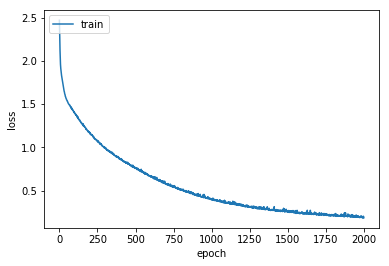

In [9]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [10]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/step
acc: 92.00%


In [12]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)


one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
